In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import random
from imdbDataSet import *
import sklearn.metrics

In [3]:
class Node:
    def __init__(self, checking_feature=None, is_leaf=False, feature_value=None, category=None):
        self.checking_feature = checking_feature
        self.feature_value = feature_value
        self.is_leaf = is_leaf
        self.category = category
        self.left_child = None
        self.right_child = None
        # keep track of how many of the checking factor have a result of yes / no
        self.pos = 0
        self.neg = 0
        self.total = 0
        
    def addPos(self):
        self.pos += 1
        self.total += 1
        
    def addNeg(self):
        self.neg += 1
        self.total += 1
    
class Stump:
    def __init__(self, root=None, left_child=None, right_child=None):
        self.root = root
        self.left_child = left_child
        self.right_child = right_child
        self.checking_feature = root.checking_feature
        

In [4]:
def createDF(x, y, sample_w, features):
    # make dataframe
    df = pd.DataFrame(x, columns=features)
    # add y column
    features.append("Positive")
    df["Positive"] = y
    # add first sample weights to dataframe
    features.append("Sample Weight")
    df["Sample weights"] = sample_w
    
    return df, x, y

# initialize list of lists
imdb = IMDB()
imdb.getTrainingData(1, 2, 3, 100, 200, 200)

# get feature vector
features = imdb.getFeatureVector(100, 200)

# get values of each feature for n movie reviews
n = 20
x_train = np.zeros((n, len(features)))
y_train = list()
# for the first n reviews
for i in range(n):
    x_i = imdb.getXtrain(i)
    y_train.append(imdb.getYtrain(i))
    # for word index in x_train
    for wi in x_i:
        if wi == 2:
            continue
        elif (wi in features):
            j = features.index(wi)
            x_train[i][j] = 1

# Create the pandas DataFrame
sample_w = [1/n for i in range(n)]
df = createDF(x_train, y_train, sample_w, features)[0]

stumps=[]
igs=[]

display(df)

,101,102,103,104,105,106,107,108,109,110,...,293,294,295,296,297,298,299,300,Positive,Sample weights
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05


In [5]:
'''
# create stumps
def makeStumps(x, y, features):
    stumps = []

    for j in range(len(features) - 2):
        root, left, right = Node(features[j]), Node(features[j], True), Node(features[j], True)
        root.left_child = left
        root.right_child = right

        for i in range(len(x)):
            if (x[i][j] == 0 and y[i] == 0):
                left.addNeg()
            elif (x[i][j] == 0 and y[i] == 1):
                left.addPos()
            elif (x[i][j] == 1 and y[i] == 0):
                right.addNeg()
            else:
                right.addPos()

        # make sure we don't have a total of 0 (so in case we have totals of 0 we can compute the fitting category below with no problem, as well as the total error later on)
        if (left.total == 0):
            left.total += sys.float_info.epsilon
        if (right.total == 0):
            right.total += sys.float_info.epsilon

        # calculate the left's / right's category
        if (left.pos / left.total > right.pos / right.total):
            left.category = 1
            right.category = 0
        else:
            left.category = 0
            right.category = 1
        s = Stump(root, left, right)
        stumps.append(s)

    return stumps

# check stumps made
stumps = makeStumps(x_train, y_train, features)
for stump in stumps:
    print("(" + str(stump.root.checking_feature) + ", " + imdb.getInvertedWordIndex(stump.root.checking_feature) + ")\n---------------------")
    print("Not in review", "\n P:", stump.left_child.pos, "\tN:", stump.left_child.neg, "\tT:", int(stump.left_child.total), "\tC:", stump.left_child.category)
    print("In review", "\n P:", stump.right_child.pos, "\tN:", stump.right_child.neg, "\tT:", int(stump.right_child.total), "\tC:", stump.right_child.category)
    print()
'''

'\n# create stumps\ndef makeStumps(x, y, features):\n    stumps = []\n\n    for j in range(len(features) - 2):\n        root, left, right = Node(features[j]), Node(features[j], True), Node(features[j], True)\n        root.left_child = left\n        root.right_child = right\n\n        for i in range(len(x)):\n            if (x[i][j] == 0 and y[i] == 0):\n                left.addNeg()\n            elif (x[i][j] == 0 and y[i] == 1):\n                left.addPos()\n            elif (x[i][j] == 1 and y[i] == 0):\n                right.addNeg()\n            else:\n                right.addPos()\n\n        # make sure we don\'t have a total of 0 (so in case we have totals of 0 we can compute the fitting category below with no problem, as well as the total error later on)\n        if (left.total == 0):\n            left.total += sys.float_info.epsilon\n        if (right.total == 0):\n            right.total += sys.float_info.epsilon\n\n        # calculate the left\'s / right\'s category\n     

In [6]:
def informationGain(category_vector, feature_values):
    category_set = set(category_vector)
    
    # calculate entropy
    HC = 0
    for c in category_set:
        PC = category_vector.count(c) / len(category_vector) # P(C=c)
        HC += - PC * np.log2(PC)
    #print("Entropy:", HC)
    
    # calculate IG(C, X)
    feature_set = set(feature_values)
    HC_feature = 0
    for value in feature_set:
        # p_feature --> P(X=x)
        P_feature = feature_values.count(value) / len(feature_values) # count occurences of value
        indices = [i for i in range(len(feature_values)) if feature_values[i] == value] # rows that have X=x
        category_of_feature = [category_vector[i] for i in indices] # category of rows listed in indices above
        for c in category_set:
            # PC_feature --> P(C=c|X=x)
            PC_feature = category_of_feature.count(c) / len(category_of_feature) # given X=x, count C
            if PC_feature != 0:
                # - P(X=x) * P(C=c|X=x) * log2(P(C=c|X=x))
                temp_H = - P_feature * PC_feature * np.log2(PC_feature)
                # sum for all values of C (class) and X (values of specific feature)
                HC_feature += temp_H
    IG = HC - HC_feature
    return IG

def makeStump(x, y, features, index):
    root, left, right = Node(features[index]), Node(features[index], True), Node(features[index], True)
    root.left_child = left
    root.right_child = right

    for i in range(len(x)):
        if (x[i][index] == 0 and y[i] == 0):
            left.addNeg()
        elif (x[i][index] == 0 and y[i] == 1):
            left.addPos()
        elif (x[i][index] == 1 and y[i] == 0):
            right.addNeg()
        else:
            right.addPos()

    # make sure we don't have a total of 0 (so in case we have totals of 0 we can compute the fitting category below with no problem, as well as the total error later on)
    if (left.total == 0):
        left.total += sys.float_info.epsilon
    if (right.total == 0):
        right.total += sys.float_info.epsilon

    # calculate the left's / right's category
    if (left.pos / left.total > right.pos / right.total):
        left.category = 1
        right.category = 0
    else:
        left.category = 0
        right.category = 1
    s = Stump(root, left, right)

    return s

# check information gain
for j in range(len(features) - 2):
    feature_values = [x_train[i][j] for i in range(len(x_train))]
    category_vector = list(y_train)
    ig = informationGain(category_vector, feature_values)
    igs.append(ig)
    print("IG:", ig, "\n")

# find max IG
max_ig_i = np.where(igs == max(igs))[0][0]

# make stump
fstump = makeStump(x_train, y_train, features, max_ig_i)
print("Choosing stump hosting feature: (" + str(fstump.checking_feature) + ", " + imdb.getInvertedWordIndex(fstump.checking_feature) + ")")


IG: 0.00015640567138941464 

IG: 0.007601804726450334 

IG: 0.08266081352364751 

IG: 0.0 

IG: 0.0 

IG: 0.14310852874469293 

IG: 0.0 

IG: 0.007601804726450334 

IG: 0.00015640567138941464 

IG: 0.06384985030594836 

IG: 0.00015640567138941464 

IG: 0.032088640756939846 

IG: 0.10326291047654512 

IG: 0.04940163365700867 

IG: 0.032088640756939846 

IG: 0.14310852874469293 

IG: 0.16690339459096037 

IG: 0.00015640567138941464 

IG: 0.01723746934784498 

IG: 0.04940163365700867 

IG: 0.007601804726450334 

IG: 0.00015640567138941464 

IG: 0.032088640756939846 

IG: 0.01723746934784498 

IG: 0.00826522814369235 

IG: 0.06639716704808485 

IG: 0.01723746934784498 

IG: 0.029883657378849238 

IG: 0.00826522814369235 

IG: 0.025373085812648966 

IG: 0.025373085812648966 

IG: 0.16690339459096037 

IG: 0.032088640756939846 

IG: 0.007601804726450334 

IG: 0.032088640756939846 

IG: 0.032088640756939846 

IG: 0.07931148461214155 

IG: 0.00015640567138941464 

IG: 0.00015640567138941464 



Total Error of 117 stump: 0.25
Stump's Importance: 0.5493061443340549


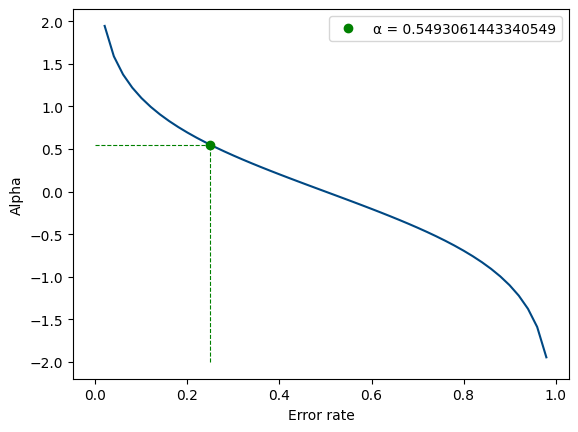

In [7]:
def amountOfSay(totalError):
    a = 0.5 * np.log((1 - totalError) / totalError)
    return a

def plotAmountOfSay(totalError, a):
    # plot the performance curve
    plt.xlabel("Error rate")
    plt.ylabel("Alpha")
    # evenly sampled error rate at 0.02 intervals
    err_rate = np.arange(0.02, 1., 0.02)
    plt.plot(err_rate, 0.5*np.log((1 - err_rate)/err_rate), '#004883')
    # plot our α
    plt.plot([totalError], [a], 'go', label="α = " + str(a))
    x_0_dotted = np.arange(-2, a+0.05, 0.05)
    y_0_dotted = np.arange(0., totalError+0.05, 0.05) if a < 2 else np.arange(0., totalError, 0.05)
    plt.plot(np.zeros(len(x_0_dotted)) + totalError, x_0_dotted, 'g--', linewidth=0.8)
    plt.plot(y_0_dotted, np.zeros(len(y_0_dotted)) + a, 'g--', linewidth=0.8)
    
    plt.legend()
    plt.show()

# calculate totalError
left_error = 0
right_error = 0
# get the error of the left and right child of the stump
if (fstump.left_child.category == 0):
    left_error = fstump.left_child.pos
    right_error = fstump.right_child.neg
else:
    left_error = fstump.left_child.neg
    right_error = fstump.right_child.pos

terror = (left_error + right_error) / (fstump.left_child.total + fstump.right_child.total)
# check if total error is either 0 or 1, if it is add / subtract sys.epsilon so the amount of say equation doesn't freak out
if (terror == 0):
    terror += sys.float_info.epsilon
elif (terror == 1):
    terror -= sys.float_info.epsilon
print("Total Error of " + str(fstump.checking_feature) + " stump:", terror)
# find performance of stump (amount of say: α)
a = amountOfSay(terror)
print("Stump's Importance:", a)
# plot the amount of say
plotAmountOfSay(terror, a)

In [8]:
def newSampleWeights(x, y, sample_w, features, stump, a):
    new_sample_weights = []
    # get index of checking feature and category
    feature_j = features.index(stump.checking_feature)
    category_j = features.index(features[len(features) - 2])

    # get each row and check if it is wrongly classified based on the feature
    for i in range(len(x)):
        n_sample = 0
        # correctly classified
        if ((x[i][feature_j] == 0 and y[i] == stump.left_child.category) or (x[i][feature_j] == 1 and y[i] == stump.right_child.category)):
            n_sample = sample_w[i] * np.exp(-a)
        # wrongly classified
        else:
            n_sample = sample_w[i] * np.exp(a)
        new_sample_weights.append(n_sample)
        
    return new_sample_weights

def normalizeSampleWeights(sample_weights):
    sample_sum = sum(sample_weights)
    for i in range(len(sample_weights)):
        sample_weights[i] = sample_weights[i] / sample_sum

def makeBuckets(sample_weight):
    buckets = []
    buckets.append(sample_weight[0])
    for i in range(1, len(sample_weight), 1):
        buckets.append(buckets[i-1] + sample_weight[i])
    return buckets
        
# make new sample weights based on the right/wrong classifications
new_sample_weights = newSampleWeights(x_train, y_train, sample_w, features, fstump, a)
print("New Sample Weights:", new_sample_weights)
# normalize new sample weights
normalizeSampleWeights(new_sample_weights)
print("New Normalized Sample Weights:", new_sample_weights)
# make buckets
buckets = makeBuckets(new_sample_weights)
print("Buckets:", buckets)

# make deep copy of the dataframe
temp_df = df.copy(True)

temp_df["New sample weights"] = new_sample_weights
temp_df["Buckets"] = buckets
display(temp_df)

New Sample Weights: [0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.08660254037844388, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.08660254037844388, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.028867513459481287, 0.08660254037844388, 0.028867513459481287, 0.08660254037844388, 0.028867513459481287, 0.08660254037844388]
New Normalized Sample Weights: [0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.10000000000000003, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.10000000000000003, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.03333333333333334, 0.10000000000000003, 0.03333333333333334, 0.10000000000000003, 0.03333333333333334, 0.10000000000000003]
Buckets: [0.03333333333333334, 0.06666666666666668, 0.10000000000000002, 0.13333333333333336

,101,102,103,104,105,106,107,108,109,110,...,295,296,297,298,299,300,Positive,Sample weights,New sample weights,Buckets
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.033333
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.066667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.100000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.133333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05,0.100000,0.233333
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.266667
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.300000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.333333
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.366667
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.033333,0.400000


In [9]:
rigged_rand = [0.38, 0.26, 0.98, 0.40, 0.55, 0.1, 0.22, 0.35, 0.68, 0.15] # Rigged random numbers (debugging)

def makeNewDF(template, x, y, features, rows):
    new_x = []
    new_y = []
    new_sample_w = [1/rows for i in range(rows)]
    features = features[:len(features)-2:1]
    # for each row in the new data set
    for i in range(rows):
        rand_num = random.uniform(0, 1)
        #print(rand_num)
        # choose a row from the old data set
        for j in range(rows):
            if (rand_num < template["Buckets"][j]):
                new_x.append(x[j])
                new_y.append(y[j])
                break
                
    return createDF(new_x, new_y, new_sample_w, features)
            
# make new data frame with the size of the original
# we each row we will generate a random number and having the "Buckets" columns as a distribution, wherever the
# radnom number falls in the "Buckets" column we will take that row and add it to the new data frame
result = makeNewDF(temp_df, x_train, y_train, features, len(y_train))
new_df = result[0]
new_x_train, new_y_train = result[1], result[2]
display(new_df)
    

,101,102,103,104,105,106,107,108,109,110,...,293,294,295,296,297,298,299,300,Positive,Sample weights
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.05


In [17]:
class Adaboost:
    def __init__(self, n_estimators=5, _print=True):
        self.n_estimators = n_estimators
        self._print = _print # print process (yes / no)
        self.x_train = None
        self.y_train = None
        self.sample_w = None
        self.features = None
        self.df = None
        self.dfs = []
        self.chosen_stump = None
        self.chosen_stumps = []
        self.chosen_stump_a = None
        self.chosen_stumps_a = []

    def fit(self, x, y, features):
        self.x_train = x
        self.y_train = y
        n = len(self.y_train)
        self.sample_w = [1/n for i in range(n)]
        self.features = features
        self.df = createDF(self.x_train, self.y_train, self.sample_w, self.features)[0]
        for i in range(self.n_estimators):
            if (self._print):
                display(self.df)
            self.train()
            if (self._print):
                print(10*"----------")
        
    def train(self):
        _igs = []
        for s in range(len(self.features) - 2):
            feature_values = [self.x_train[i][s] for i in range(len(self.x_train))]
            category_vector = list(self.y_train)
            ig = informationGain(category_vector, feature_values)
            _igs.append(ig)
            if (self._print):
                print("IG:", ig, "\n")

        # find max IG
        _max_ig_i = np.where(_igs == max(_igs))[0][0]

        # make stump
        self.chosen_stump = makeStump(self.x_train, self.y_train, self.features, _max_ig_i)
        if (self._print):
            print("Choosing stump hosting feature: (" + str(self.chosen_stump.checking_feature) + ", " + imdb.getInvertedWordIndex(self.chosen_stump.checking_feature) + ")")

        if (self._print):
            print("Choosing stump hosting feature: (" + str(self.chosen_stump.checking_feature) + ", " + imdb.getInvertedWordIndex(self.chosen_stump.checking_feature) + ")")
            print("Not in review", "\n P:", self.chosen_stump.left_child.pos, "\tΝ:", self.chosen_stump.left_child.neg, "\tT:", int(self.chosen_stump.left_child.total), "\tC:", self.chosen_stump.left_child.category)
            print("In review", "\n P:", self.chosen_stump.right_child.pos, "\tN:", self.chosen_stump.right_child.neg, "\tT:", int(self.chosen_stump.right_child.total), "\tC:", self.chosen_stump.right_child.category)
            print()
        self.chosen_stumps.append(self.chosen_stump)
        
        # calculate totalError
        left_error = 0
        right_error = 0
        # get the error of the left and right child of the stump
        if (self.chosen_stump.left_child.category == 0):
            left_error = self.chosen_stump.left_child.pos
            right_error = self.chosen_stump.right_child.neg
        else:
            left_error = self.chosen_stump.left_child.neg
            right_error = self.chosen_stump.right_child.pos

        _terror = (left_error + right_error) / (self.chosen_stump.left_child.total + self.chosen_stump.right_child.total)
        # check if total error is either 0 or 1, if it is add / subtract sys.epsilon so the amount of say equation doesn't freak out
        if (_terror == 0):
            _terror += sys.float_info.epsilon
        elif (_terror == 1):
            _terror -= sys.float_info.epsilon

        # find performance of stump (amount of say: α)
        self.chosen_stump_a = amountOfSay(_terror)
        self.chosen_stumps_a.append(self.chosen_stump_a)

        if (self._print):
            print("Total Error of " + str(self.chosen_stump.checking_feature) + " stump:", _terror)
            print("Stump's Importance:", self.chosen_stump_a)
            # plot the amount of say
            plotAmountOfSay(_terror, self.chosen_stump_a)
        
        # make new sample weights based on the right/wrong classifications
        _new_sample_weights = newSampleWeights(self.x_train, self.y_train, self.sample_w, self.features, self.chosen_stump, self.chosen_stump_a)
        if (self._print):
            print("New Sample Weights:", _new_sample_weights)
        # normalize new sample weights
        normalizeSampleWeights(_new_sample_weights)
        # make buckets
        _buckets = makeBuckets(_new_sample_weights)
        if (self._print):
            print("New Normalized Sample Weights:", _new_sample_weights)
            print("Buckets:", buckets)
        
        self.df["New sample weights"] = _new_sample_weights
        self.df["Buckets"] = _buckets
        if (self._print):
            display(self.df)
        
        # make new data frame with the size of the original
        # we each row we will generate a random number and having the "Buckets" columns as a distribution, wherever the
        # radnom number falls in the "Buckets" column we will take that row and add it to the new data frame
        self.dfs.append(self.df)
        n = len(self.df)
        new_data_frame = makeNewDF(self.df, self.x_train, self.y_train, self.features, n)
        self.df, self.x_train, self.y_train = new_data_frame[0], new_data_frame[1], new_data_frame[2]
        self.sample_w = [1/n for i in range(n)]

    def predict(self, X, cap, features):
        if (features != self.features):
            print("Features of given don't match")
            return
        
        predictions = list()
        tempX = X[:cap]
        
        # for every x in X
        for x in tempX:
            positive_votes = list()
            negative_votes = list()
            # for every stump in the stump forest
            for i in range(len(self.chosen_stumps)):
                # stump
                stump = self.chosen_stumps[i]
                # what are we checking in this stump
                checking_word = stump.checking_feature
                # check if the word exists in the given x
                if (checking_word in x):
                    # then go to right_child
                    # if the category is negative
                    if (stump.right_child.category == 0):
                        negative_votes.append(self.chosen_stumps_a[i])
                    # if the category is positive
                    else:
                        positive_votes.append(self.chosen_stumps_a[i])
                # if it doesn't exist in x
                else:
                    # then go to left child
                    # if the category is negative
                    if (stump.left_child.category == 0):
                        negative_votes.append(self.chosen_stumps_a[i])
                    # if the category is positive
                    else:
                        positive_votes.append(self.chosen_stumps_a[i])
            # check which has the biggest sum
            #print("\nP:", positive_votes, "\nN:", negative_votes)
            #print("Sum(P):", sum(positive_votes), "\tSum(N):", sum(negative_votes))
            #print(sum(positive_votes), "\n", sum(negative_votes))
            # positive
            if (sum(positive_votes) >= sum(negative_votes)):
                predictions.append(1)
            # negative
            else:
                predictions.append(0)

        return predictions


    

In [20]:
'''
# print the reviews of 1000 movies
for i in range(1000):
    print("["+str(i)+"]:", imdb.getDecodedSequence(real[1][0], i))
'''

def runTest(N=250, M=10000, REVIEWS=1000, TESTS=1000, ESTIMATORS=12):
    res = imdb.getTrainingData(1, 2, 3, N, M, 2000)
    train, test = res[0], res[1]
    actual = test[1][:TESTS]
    #print("Actual reviews:", actual)

    # get feature vector
    features = imdb.getFeatureVector(N, M)

    # get values of each feature for n movie reviews
    n = REVIEWS
    x_train = np.zeros((n, len(features)))
    y_train = list()
    # for the first n reviews
    for i in range(n):
        x_i = imdb.getXtrain(i)
        y_train.append(imdb.getYtrain(i))
        # for word index in x_train
        for wi in x_i:
            if wi == 2:
                continue
            elif (wi in features):
                j = features.index(wi)
                x_train[i][j] = 1

    adaboost = Adaboost(n_estimators=ESTIMATORS, _print=False)
    adaboost.fit(x_train, y_train, features)

    # test
    predictions_train = adaboost.predict(x_train, TESTS, features)
    predictions = adaboost.predict(test[0], TESTS, features)
    #print(predictions)
    '''
    error = []
    for i in range(TESTS):
        error.append(abs(actual[i] - predictions[i]))
    print(1 - sum(error) / len(error))
    '''

    accuracy_score_test = sklearn.metrics.accuracy_score(y_pred=predictions, y_true=actual)
    accuracy_score_train = sklearn.metrics.accuracy_score(y_pred=predictions_train, y_true=y_train[:TESTS])
    recall_score_test = sklearn.metrics.recall_score(y_pred=predictions, y_true=actual)
    f1_score_test = sklearn.metrics.f1_score(y_pred=predictions, y_true=actual)

    return accuracy_score_test, accuracy_score_train, recall_score_test, f1_score_test



In [21]:
# initialize list of lists
imdb = IMDB()
real = imdb.getTrainingData(1, 2, 3, 0, 60000, 2000)

x = []
for j in range(5):
    x.append((j+1)*1000)
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
f1_scores = []

for i in range(1, 6):
    final = runTest(250, 10000, 100*i, 24000, 12)
    accuracy_scores.append(final[0])
    accuracy_scores_train.append(final[1])
    recall_scores.append(final[2])
    f1_scores.append(final[3])
print("Accuracy:", accuracy_scores)
print("Accuracy Train:", accuracy_scores_train)
print("Recall:", recall_scores)
print("F1 Score:", f1_scores)

Accuracy: [0.5055, 0.5518333333333333, 0.5070416666666666, 0.5393333333333333, 0.5834166666666667]
Accuracy Train: [0.58, 0.425, 0.53, 0.51, 0.5]
Recall: [0.021107959285833474, 0.8561655264475221, 0.0663273819456032, 0.24061404972467879, 0.9197396963123644]
F1 Score: [0.04089219330855019, 0.6561381074168798, 0.11847105282765813, 0.3428435568235853, 0.6880109842101979]


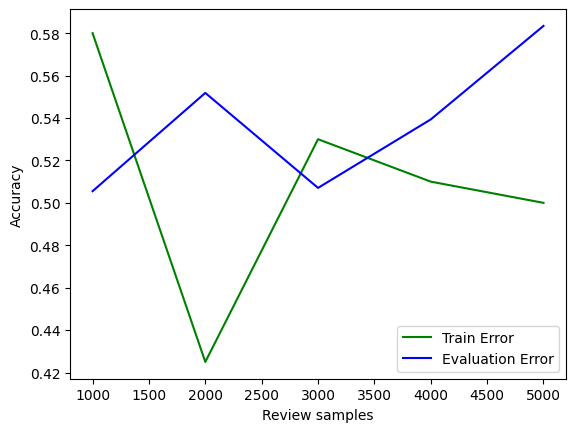

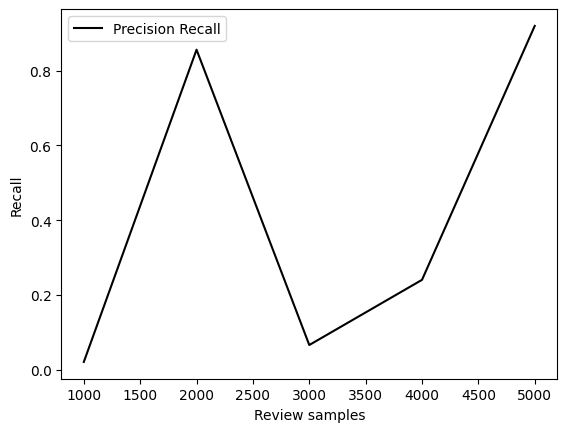

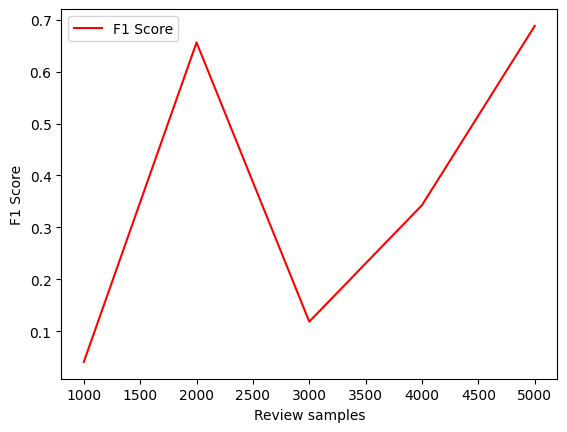

In [22]:
# plot results

# plot the accuracy curve
plt.xlabel("Review samples")
plt.ylabel("Accuracy")

plt.plot(x, accuracy_scores_train, 'green', label="Train Error")
plt.plot(x, accuracy_scores, 'blue', label="Evaluation Error")

plt.legend()
plt.show()

# plot the recall curve
plt.xlabel("Review samples")
plt.ylabel("Recall")

plt.plot(x, recall_scores, 'black', label="Precision Recall")

plt.legend()
plt.show()

# plot the f1 score curve
plt.xlabel("Review samples")
plt.ylabel("F1 Score")

plt.plot(x, f1_scores, 'red', label="F1 Score")

plt.legend()
plt.show()